<a href="https://colab.research.google.com/github/cintiapinho/logicaprogramacaopython/blob/main/Pequenos%20Talentos/Previs%C3%A3o_de_Processos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install spacy scikit-learn pandas
!python -m spacy download pt_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 28.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, classification_report
import spacy

# Carregue o modelo SpaCy
nlp = spacy.load("pt_core_news_sm")

In [4]:
url = "https://raw.githubusercontent.com/profcintiapinho/ProjetoOrangeJuridico/main/BASE_DE_DADOS_ORIGINAL_CONVERTIDA%20(1).csv"
df = pd.read_csv(url)
df

,ID,Processo,Tipo
0,1,Funcionário alega salários não pagos após demi...,Trabalhista
1,2,Acusado de vandalismo em propriedade pública d...,Criminal
2,3,Disputa sobre quebra de contrato de prestação ...,Cível
3,4,Empregado busca indenização por assédio moral ...,Trabalhista
4,5,Julgamento de fraude em transações financeiras...,Criminal
...,...,...,...
171,172,Caso de plágio em obra artística.,Cível
172,173,Acusação de fraude em contratos de prestação d...,Criminal
173,174,Ação de reparação por danos causados por vazam...,Cível
174,175,Julgamento de negligência médica em cirurgia d...,Cível


In [5]:
# Função para aplicar SpaCy e retornar o texto lematizado
def lemmatize_text(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc if not token.is_stop])

# Aplica a função de lematização
df['Processo'] = df['Processo'].apply(lemmatize_text)

# Vetorização usando TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Processo'])
y = df['Tipo']

In [6]:
# Divisão em treino e teste (85% treino, 15% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [7]:
# 1. Árvore de Decisão
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
y_pred_dt = clf_dt.predict(X_test)

# 2. SGDClassifier
clf_sgd = SGDClassifier()
clf_sgd.fit(X_train, y_train)
y_pred_sgd = clf_sgd.predict(X_test)

# 3. SVM Linear
clf_svc = SVC(kernel='linear')
clf_svc.fit(X_train, y_train)
y_pred_svc = clf_svc.predict(X_test)

In [10]:

# Função para imprimir as métricas
def evaluate_model(y_test, y_pred, model_name):
    print(f"Modelo: {model_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print("Matriz de Confusão:")
    print(confusion_matrix(y_test, y_pred))
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred))

# Avaliação
evaluate_model(y_test, y_pred_dt, "Árvore de Decisão")
evaluate_model(y_test, y_pred_sgd, "SGDClassifier")
evaluate_model(y_test, y_pred_svc, "SVM Linear")

Modelo: Árvore de Decisão
Accuracy: 0.8888888888888888
Matriz de Confusão:
[[ 9  2  0]
 [ 0 12  0]
 [ 0  1  3]]

Relatório de Classificação:
              precision    recall  f1-score   support

    Criminal       1.00      0.82      0.90        11
       Cível       0.80      1.00      0.89        12
 Trabalhista       1.00      0.75      0.86         4

    accuracy                           0.89        27
   macro avg       0.93      0.86      0.88        27
weighted avg       0.91      0.89      0.89        27

Modelo: SGDClassifier
Accuracy: 0.9259259259259259
Matriz de Confusão:
[[ 9  2  0]
 [ 0 12  0]
 [ 0  0  4]]

Relatório de Classificação:
              precision    recall  f1-score   support

    Criminal       1.00      0.82      0.90        11
       Cível       0.86      1.00      0.92        12
 Trabalhista       1.00      1.00      1.00         4

    accuracy                           0.93        27
   macro avg       0.95      0.94      0.94        27
weighted avg   

In [11]:
!pip install seaborn matplotlib scikit-learn

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

In [14]:
# Função para plotar matriz de confusão
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    labels = np.unique(y_test)

    plt.figure(figsize=(10, 7))
    sns.set(font_scale=1.4)  # Aumentar o tamanho da fonte
    sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('Actual', fontsize=14)
    plt.title(f'Confusion Matrix - {model_name}', fontsize=16)
    plt.show()

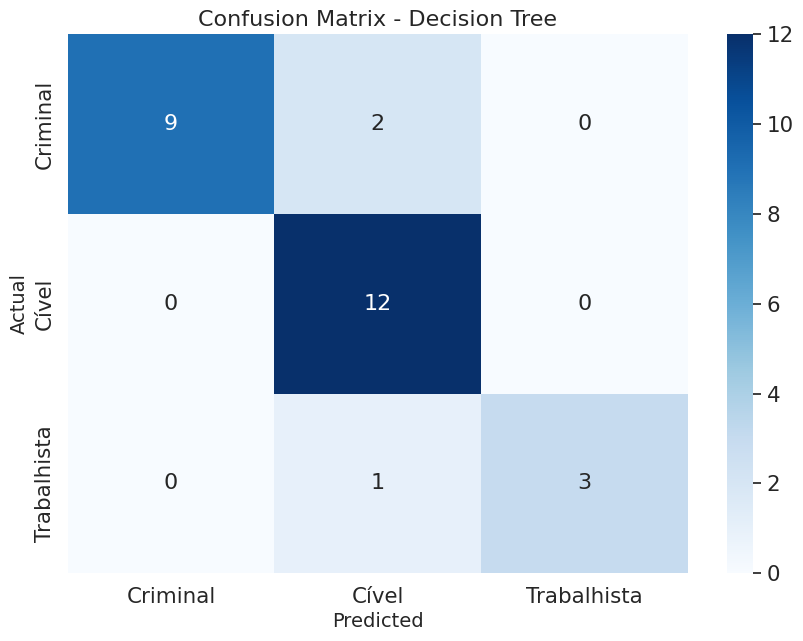

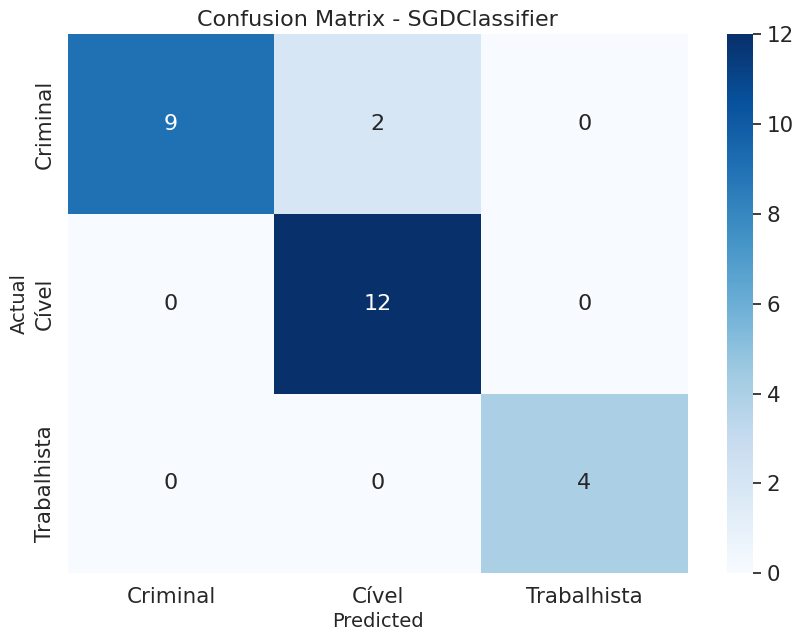

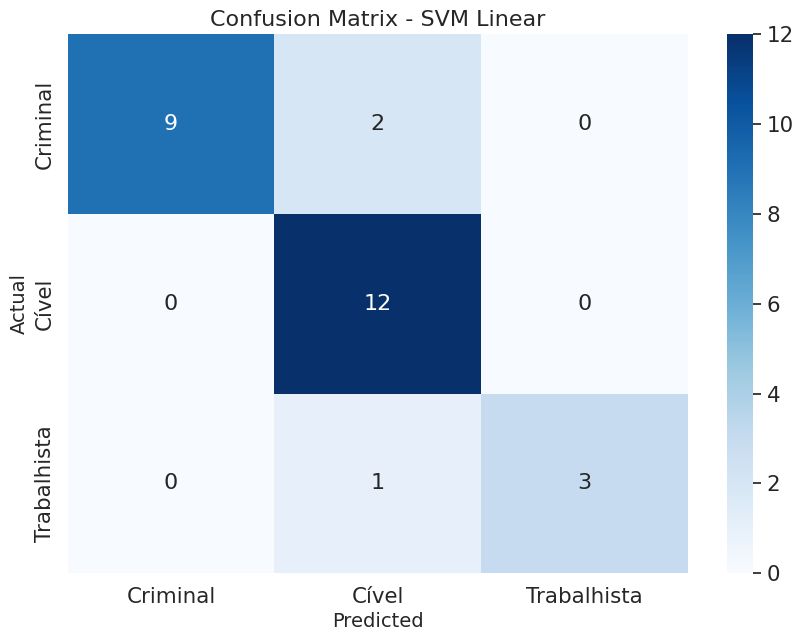

In [15]:
# Plotar para cada modelo
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree")
plot_confusion_matrix(y_test, y_pred_sgd, "SGDClassifier")
plot_confusion_matrix(y_test, y_pred_svc, "SVM Linear")